In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings('ignore')

In [2]:
df=pd.read_csv("/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv",encoding='latin1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [5]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
pd.set_option("display.float_format","{:.2f}".format)

In [9]:
category_subscribers_mean=df.groupby('category')['subscribers'].mean()

In [10]:
category_subscribers_mean

category
Autos & Vehicles        17850000.00
Comedy                  20123188.41
Education               26542222.22
Entertainment           21403319.50
Film & Animation        28584782.61
Gaming                  20852127.66
Howto & Style           19390000.00
Movies                  25650000.00
Music                   25717821.78
News & Politics         20630769.23
Nonprofits & Activism   27750000.00
People & Blogs          21056060.61
Pets & Animals          18100000.00
Science & Technology    18617647.06
Shows                   41615384.62
Sports                  27109090.91
Trailers                39000000.00
Travel & Events         12500000.00
Name: subscribers, dtype: float64

In [11]:
category_subscribers_mean.sort_values(ascending=False,inplace=True)

Text(0, 0.5, 'Subscribers')

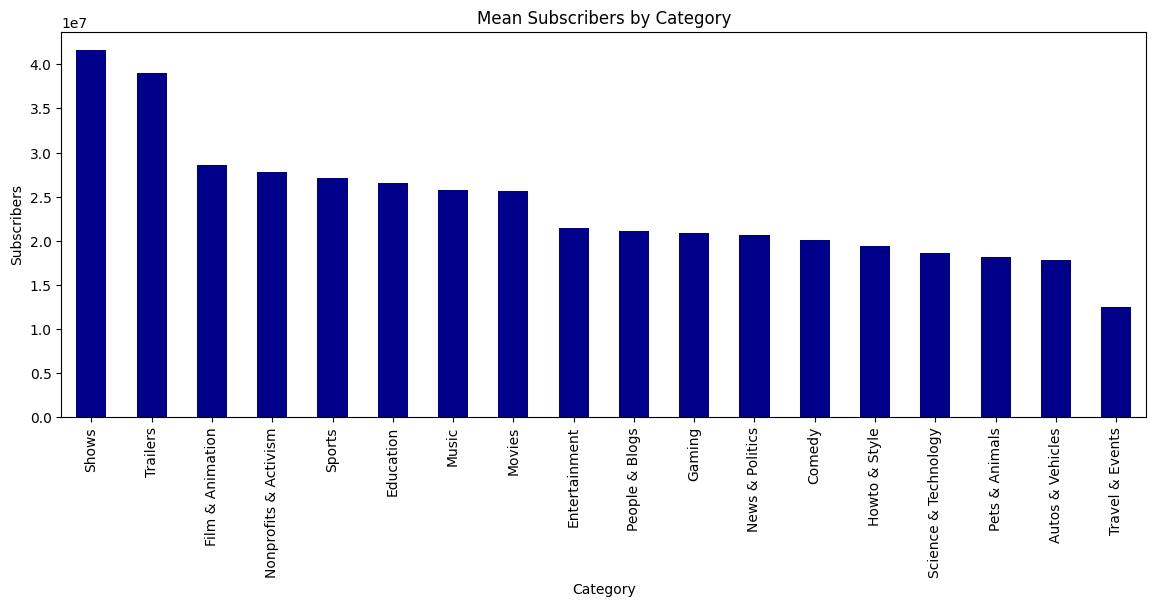

In [12]:
plt.figure(figsize=(14,5))
category_subscribers_mean.plot(kind='bar',color='darkblue')
plt.title("Mean Subscribers by Category")
plt.xlabel("Category")
plt.ylabel("Subscribers")

Text(0, 0.5, 'Subscribers')

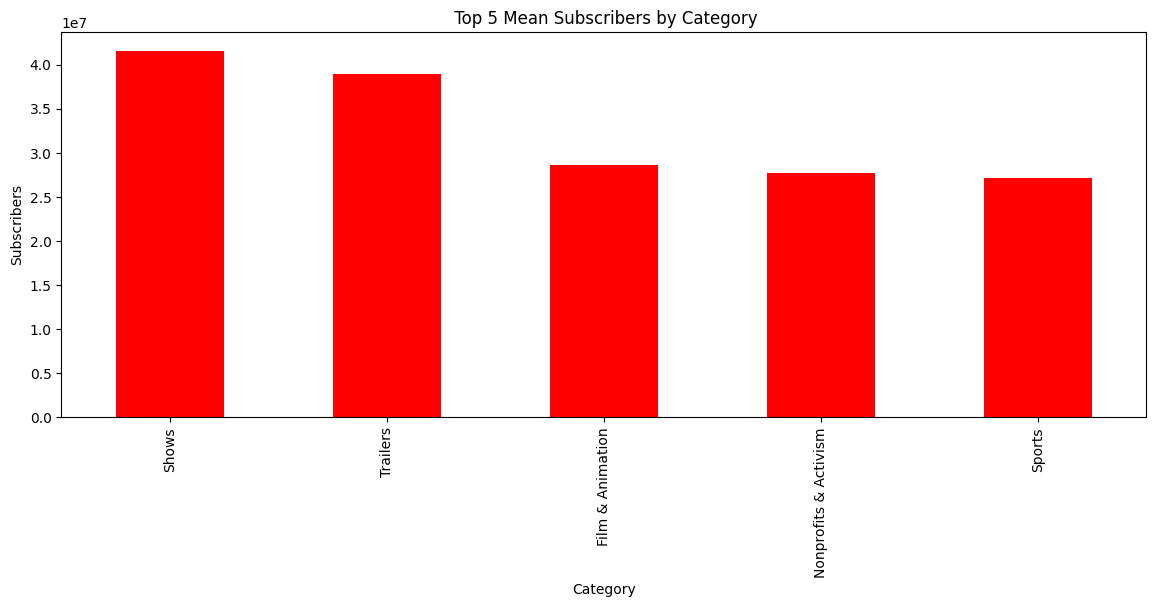

In [13]:
plt.figure(figsize=(14,5))
category_subscribers_mean.head().plot(kind='bar',color='red')
plt.title(" Top 5 Mean Subscribers by Category")
plt.xlabel("Category")
plt.ylabel("Subscribers")

Text(0, 0.5, 'Subscribers')

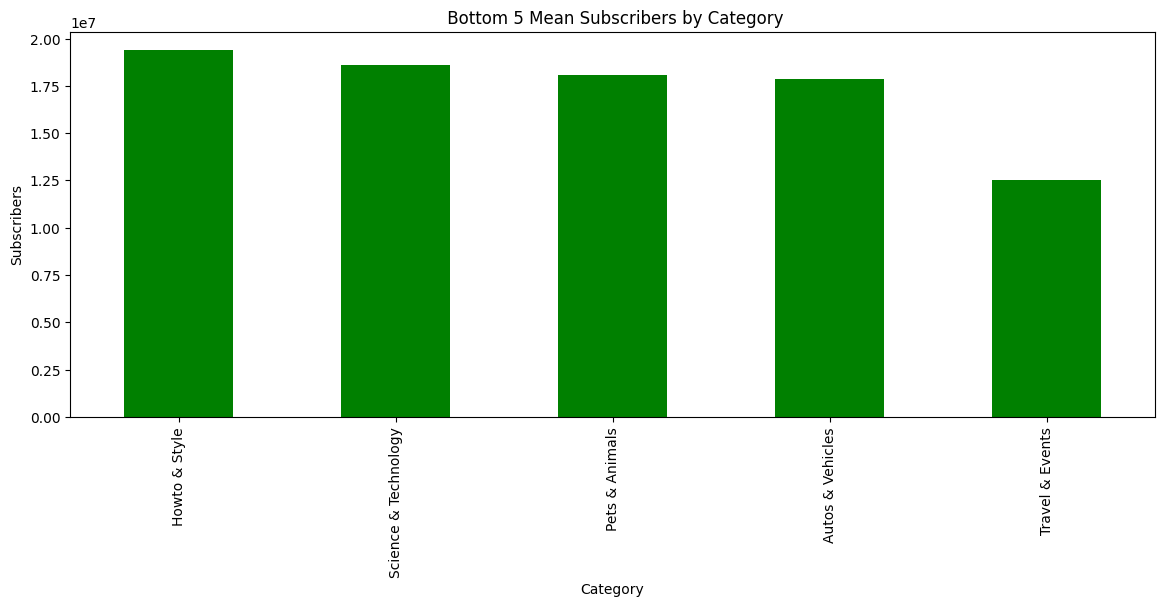

In [14]:
plt.figure(figsize=(14,5))
category_subscribers_mean.tail().plot(kind='bar',color='green')
plt.title(" Bottom 5 Mean Subscribers by Category")
plt.xlabel("Category")
plt.ylabel("Subscribers")

In [15]:
channel_type_counts=df['channel_type'].value_counts()

In [16]:
channel_type_counts

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

In [17]:
channel_type_counts.sort_values(inplace=True)

Text(0, 0.5, 'Counts')

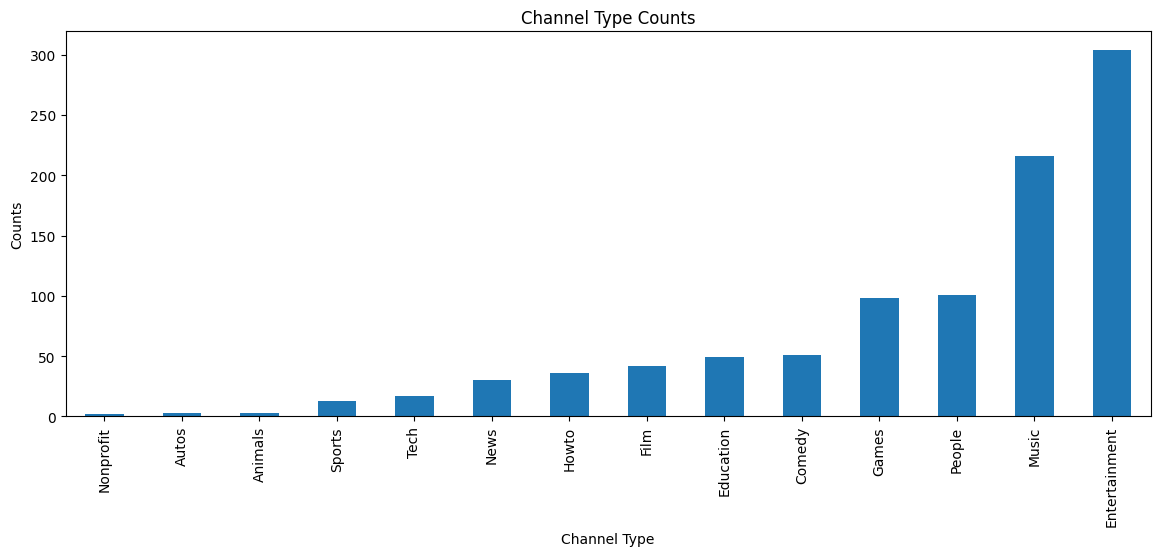

In [18]:
plt.figure(figsize=(14,5))
channel_type_counts.plot(kind='bar')
plt.title("Channel Type Counts")
plt.xlabel("Channel Type")
plt.ylabel("Counts")

Text(0.5, 1.0, 'Channel Type Distribution')

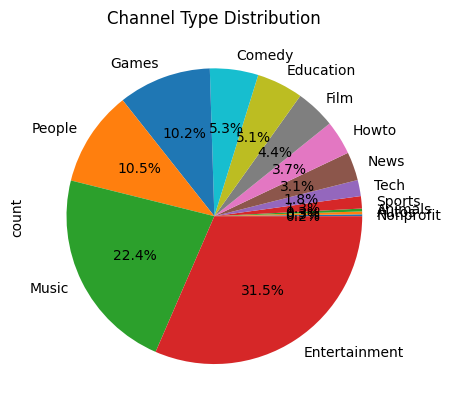

In [19]:
channel_type_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title("Channel Type Distribution")

Text(0.5, 1.0, 'TOP 5 Channel Type Distribution')

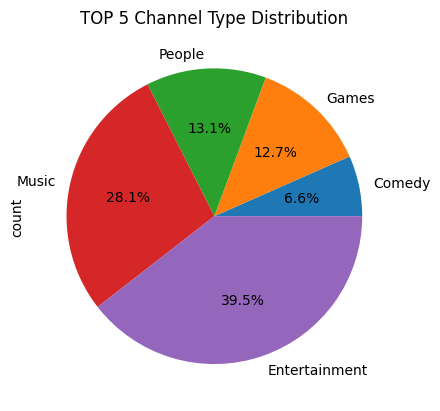

In [20]:
channel_type_counts.tail().plot(kind='pie',autopct='%1.1f%%')
plt.title("TOP 5 Channel Type Distribution")

Text(0.5, 0, 'Video Views')

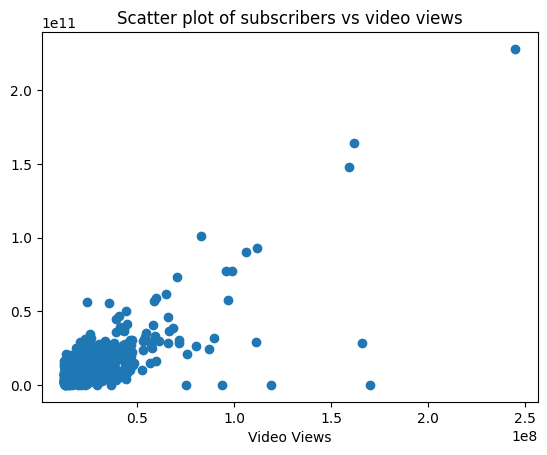

In [21]:
plt.scatter(df['subscribers'],df['video views'])
plt.title('Scatter plot of subscribers vs video views')
plt.xlabel('Subscribers')
plt.xlabel('Video Views')

In [22]:
country_subs=df.groupby('Country')['subscribers'].sum().sort_values(ascending=False)

In [23]:
country_subs

Country
United States           7329500000
India                   4310600000
Brazil                  1221800000
United Kingdom           917400000
Mexico                   626900000
Indonesia                534100000
South Korea              481700000
Russia                   407200000
Thailand                 386500000
Spain                    385100000
Canada                   363900000
Argentina                328500000
Colombia                 264500000
Philippines              240100000
Japan                    189100000
Saudi Arabia             179100000
Australia                172000000
Pakistan                 155400000
United Arab Emirates     148200000
Ukraine                  125600000
Germany                  116400000
Turkey                    91600000
Chile                     87200000
France                    83900000
Jordan                    67000000
Sweden                    63000000
Singapore                 59700000
Netherlands               58100000
Vietnam     

Text(0, 0.5, 'Total Subscribers')

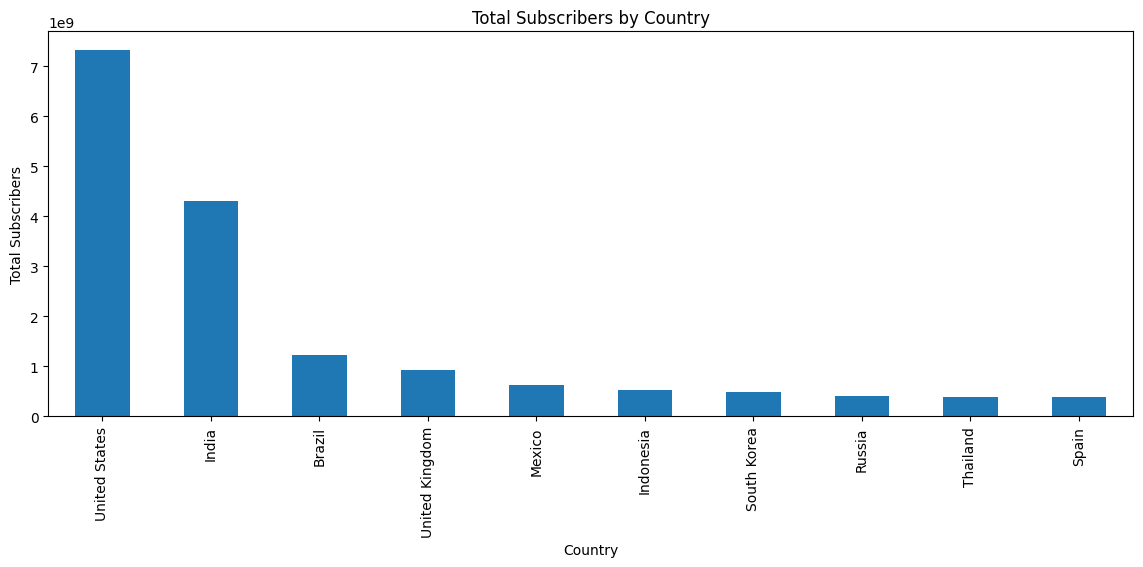

In [24]:
plt.figure(figsize=(14,5))
country_subs.head(10).plot(kind='bar')
plt.title("Total Subscribers by Country")
plt.xlabel('Country')
plt.ylabel('Total Subscribers')

In [25]:
year_wise=df.groupby('created_year')['subscribers'].mean().sort_values()

In [26]:
year_wise

created_year
2022.00   13640000.00
2021.00   18573913.04
2019.00   18639393.94
2017.00   18666176.47
2014.00   20618367.35
2010.00   20670833.33
2015.00   21247945.21
2020.00   21350000.00
2011.00   21800000.00
2018.00   23060869.57
2016.00   23101298.70
2009.00   23105769.23
2008.00   23652173.91
2012.00   24038235.29
2013.00   24527631.58
2007.00   24902040.82
2005.00   25829166.67
2006.00   31884615.38
1970.00   36300000.00
Name: subscribers, dtype: float64

Text(0, 0.5, 'Mean Subscribers')

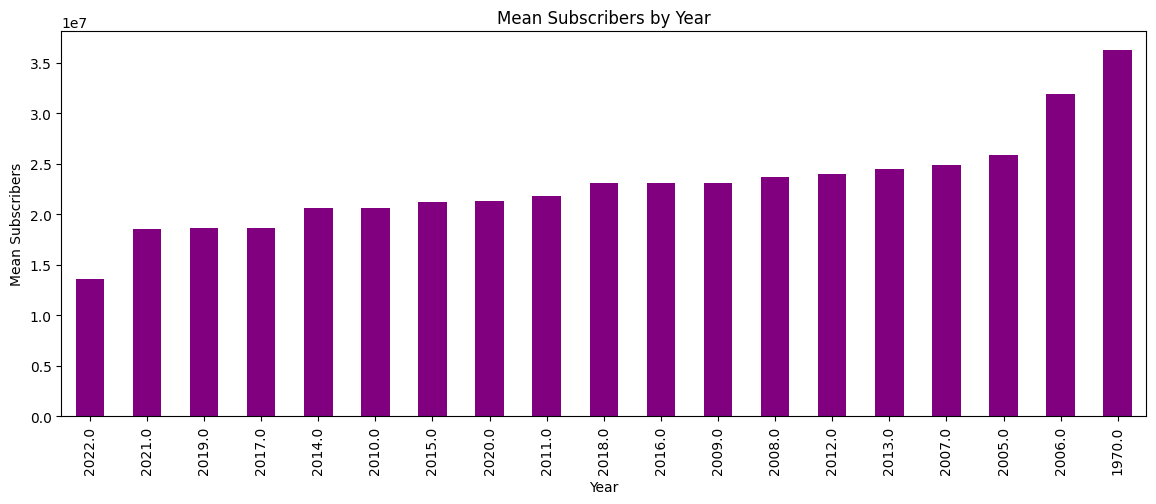

In [27]:
plt.figure(figsize=(14,5))
year_wise.plot(kind='bar',color='Purple')
plt.title("Mean Subscribers by Year")
plt.xlabel('Year')
plt.ylabel('Mean Subscribers')

In [28]:
type_wise=df.groupby('channel_type')['video_views_rank'].median().sort_values()

In [29]:
type_wise

channel_type
Animals             136.00
Music               385.00
Education           538.00
News                611.50
Entertainment       796.00
Film                880.00
Comedy             1033.00
Sports             1186.00
Nonprofit          1537.50
Howto              1574.50
People             1868.00
Games              1944.00
Tech               2420.00
Autos           3468229.00
Name: video_views_rank, dtype: float64

In [30]:
df.groupby('Country')['subscribers_for_last_30_days'].median().sort_values(ascending=False)

Country
Sweden                 1550000.00
Kuwait                 1300000.00
Latvia                 1200000.00
Italy                  1050000.00
Japan                   850000.00
Pakistan                400000.00
South Korea             400000.00
Argentina               400000.00
Australia               300000.50
Colombia                300000.00
India                   300000.00
Chile                   200000.00
Ecuador                 200000.00
Malaysia                200000.00
El Salvador             200000.00
Turkey                  200000.00
United Arab Emirates    200000.00
United States           200000.00
Saudi Arabia            200000.00
Russia                  150000.00
Philippines             150000.00
Netherlands             150000.00
Vietnam                 150000.00
Mexico                  100000.00
Jordan                  100000.00
Barbados                100000.00
United Kingdom          100000.00
Brazil                  100000.00
Ukraine                 100000.00
Canada

In [31]:
df.groupby('created_month')['subscribers'].sum().sort_values(ascending=False)

created_month
Sep    2496200000
Mar    2320500000
Jan    2254600000
May    1997700000
Nov    1930200000
Jul    1922300000
Jun    1846400000
Aug    1813600000
Apr    1581200000
Dec    1577300000
Feb    1533800000
Oct    1503700000
Name: subscribers, dtype: int64

In [32]:
df.groupby('category')['video views'].std().sort_values(ascending=False)

category
Shows                   43723894661.85
Education               25572139026.30
Sports                  21703831459.30
Music                   17782784424.31
People & Blogs          12510420847.25
Film & Animation        10899550880.91
Entertainment           10128204611.48
Pets & Animals           6475165093.46
Comedy                   6406251669.42
Gaming                   5835933598.17
News & Politics          5165961804.90
Howto & Style            4300326961.46
Movies                   3353301875.46
Autos & Vehicles         2964425983.84
Science & Technology     2937981619.12
Nonprofits & Activism    2698145850.47
Trailers                 1382496086.18
Travel & Events                    NaN
Name: video views, dtype: float64

In [33]:
df.groupby('Country')['Unemployment rate'].min().sort_values()

Country
Thailand                0.75
Cuba                    1.64
Vietnam                 2.01
Philippines             2.15
Kuwait                  2.18
Japan                   2.29
United Arab Emirates    2.35
Germany                 3.04
Netherlands             3.20
Peru                    3.31
Malaysia                3.32
Mexico                  3.42
United Kingdom          3.85
Ecuador                 3.97
El Salvador             4.11
Singapore               4.11
South Korea             4.15
Bangladesh              4.19
China                   4.32
Pakistan                4.45
Switzerland             4.58
Russia                  4.59
Indonesia               4.69
Australia               5.27
India                   5.36
Canada                  5.56
Saudi Arabia            5.93
Sweden                  6.48
Latvia                  6.52
Finland                 6.59
Chile                   7.09
Samoa                   8.36
France                  8.43
Venezuela               8.80
Ukrain

In [34]:
df.groupby('channel_type')['uploads'].sum()

channel_type
Animals            42868
Autos                949
Comedy             81722
Education         146355
Entertainment    3345035
Film              114654
Games             399473
Howto              79417
Music             424950
News             3989151
Nonprofit         205824
People            117424
Sports            158995
Tech               33780
Name: uploads, dtype: int64

In [35]:
df.groupby(['channel_type','Country'])['uploads'].sum()

channel_type  Country             
Animals       United States           42868
Autos         Japan                      93
              United Arab Emirates      855
Comedy        Argentina                 921
              Brazil                   1756
                                      ...  
Tech          Canada                   7429
              Germany                  1411
              India                   12405
              United Kingdom           1577
              United States            6312
Name: uploads, Length: 171, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Games'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'People'),
  Text(5, 0, 'Sports'),
  Text(6, 0, 'Film'),
  Text(7, 0, 'News'),
  Text(8, 0, 'Comedy'),
  Text(9, 0, 'Howto'),
  Text(10, 0, 'Nonprofit'),
  Text(11, 0, 'Autos'),
  Text(12, 0, 'Tech'),
  Text(13, 0, 'Animals')])

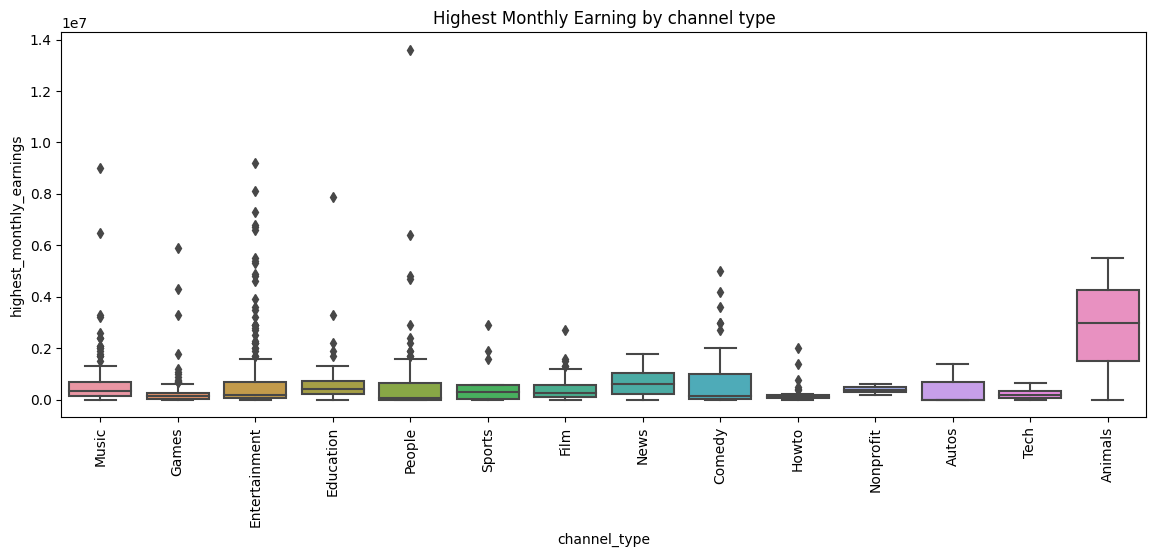

In [36]:
plt.figure(figsize=(14,5))
sns.boxplot(x='channel_type',y='highest_monthly_earnings',data=df)
plt.title("Highest Monthly Earning by channel type")
plt.xticks(rotation=90)

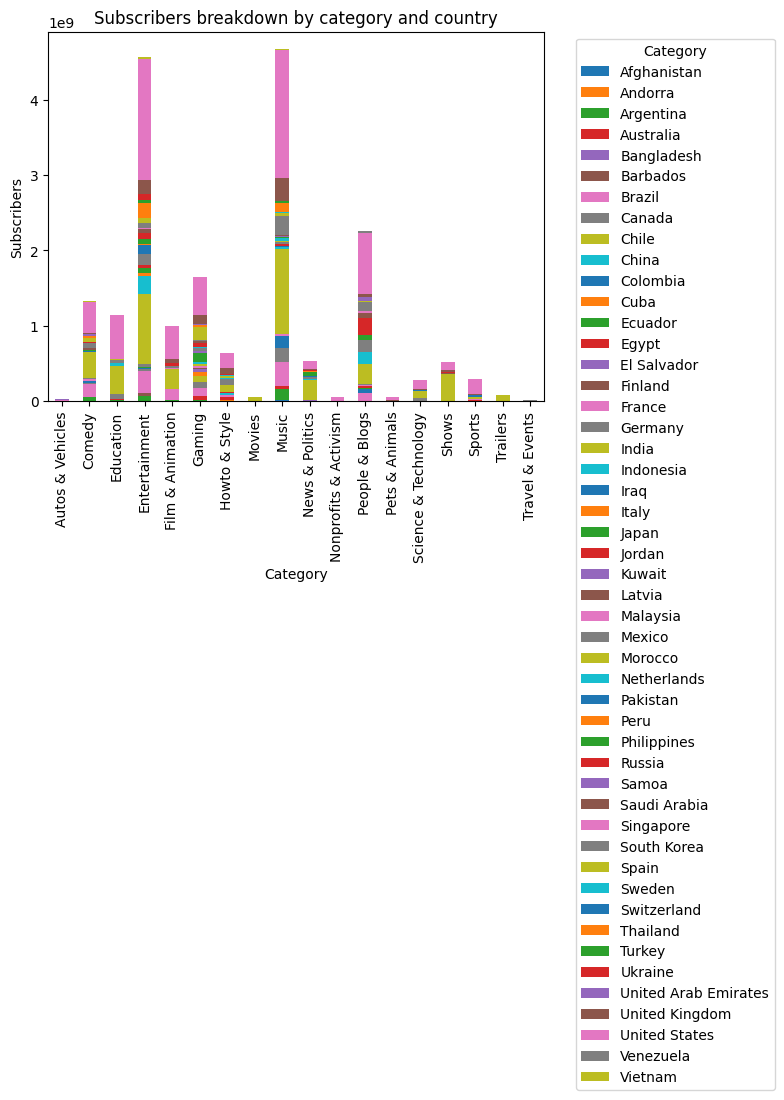

In [37]:
df.groupby(['category','Country'])['subscribers'].sum().unstack().plot(kind='bar',stacked=True)
plt.title("Subscribers breakdown by category and country")
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.legend(title='Category',bbox_to_anchor=(1.05,1),loc='upper left')

Text(0, 0.5, 'Subscribers')

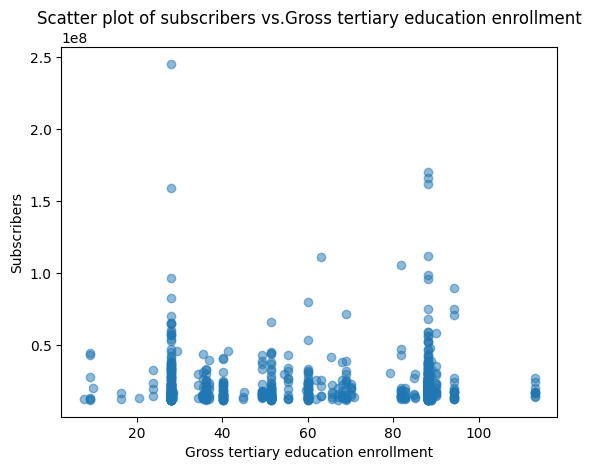

In [38]:
plt.scatter(df['Gross tertiary education enrollment (%)'],df['subscribers'],alpha=0.5)
plt.title("Scatter plot of subscribers vs.Gross tertiary education enrollment")
plt.xlabel('Gross tertiary education enrollment')
plt.ylabel('Subscribers')

Text(0.5, 1.0, 'Distribution of average unemploment rate by channel type')

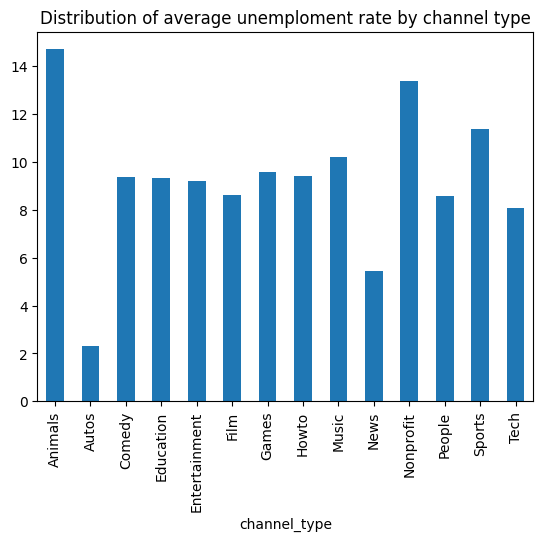

In [39]:
df.groupby('channel_type')['Unemployment rate'].mean().plot(kind='bar')
plt.title("Distribution of average unemploment rate by channel type")

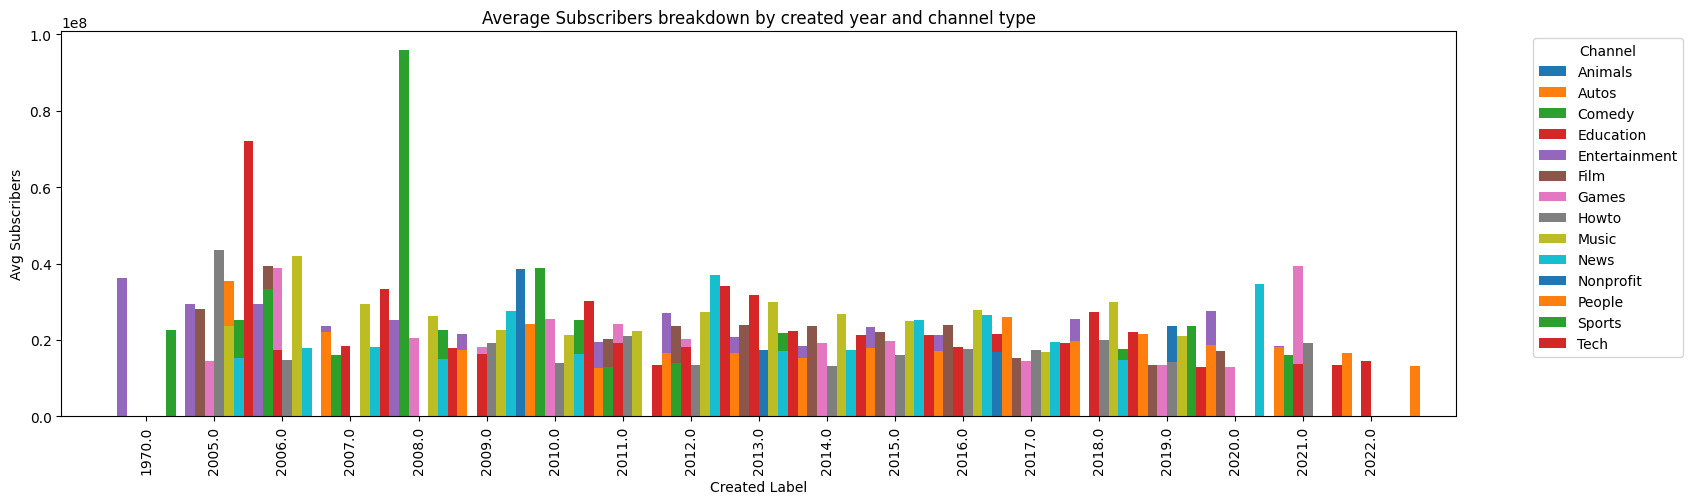

In [47]:
df.groupby(['created_year','channel_type'])['subscribers'].mean().unstack().plot(kind='bar',width=2,figsize=(18,5))
plt.title("Average Subscribers breakdown by created year and channel type")
plt.xlabel('Created Label')
plt.ylabel('Avg Subscribers')
plt.legend(title='Channel',bbox_to_anchor=(1.05,1),loc='upper left')

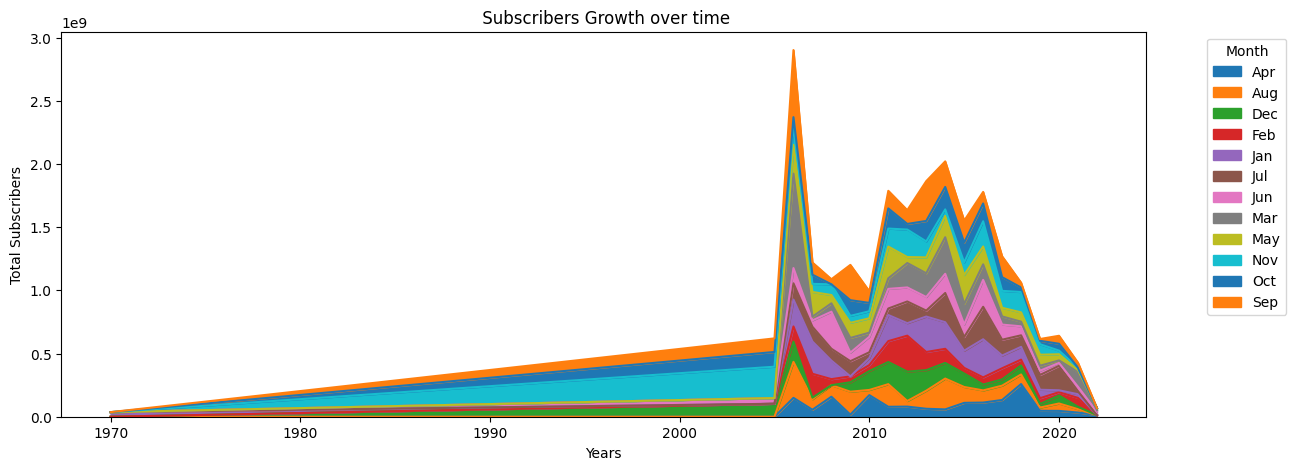

In [45]:
df.groupby(['created_year','created_month'])['subscribers'].sum().unstack().plot(kind='area',stacked=True,figsize=(14,5))
plt.title(" Subscribers Growth over time")
plt.xlabel('Years')
plt.ylabel('Total Subscribers')
plt.legend(title='Month',bbox_to_anchor=(1.05,1),loc='upper left')

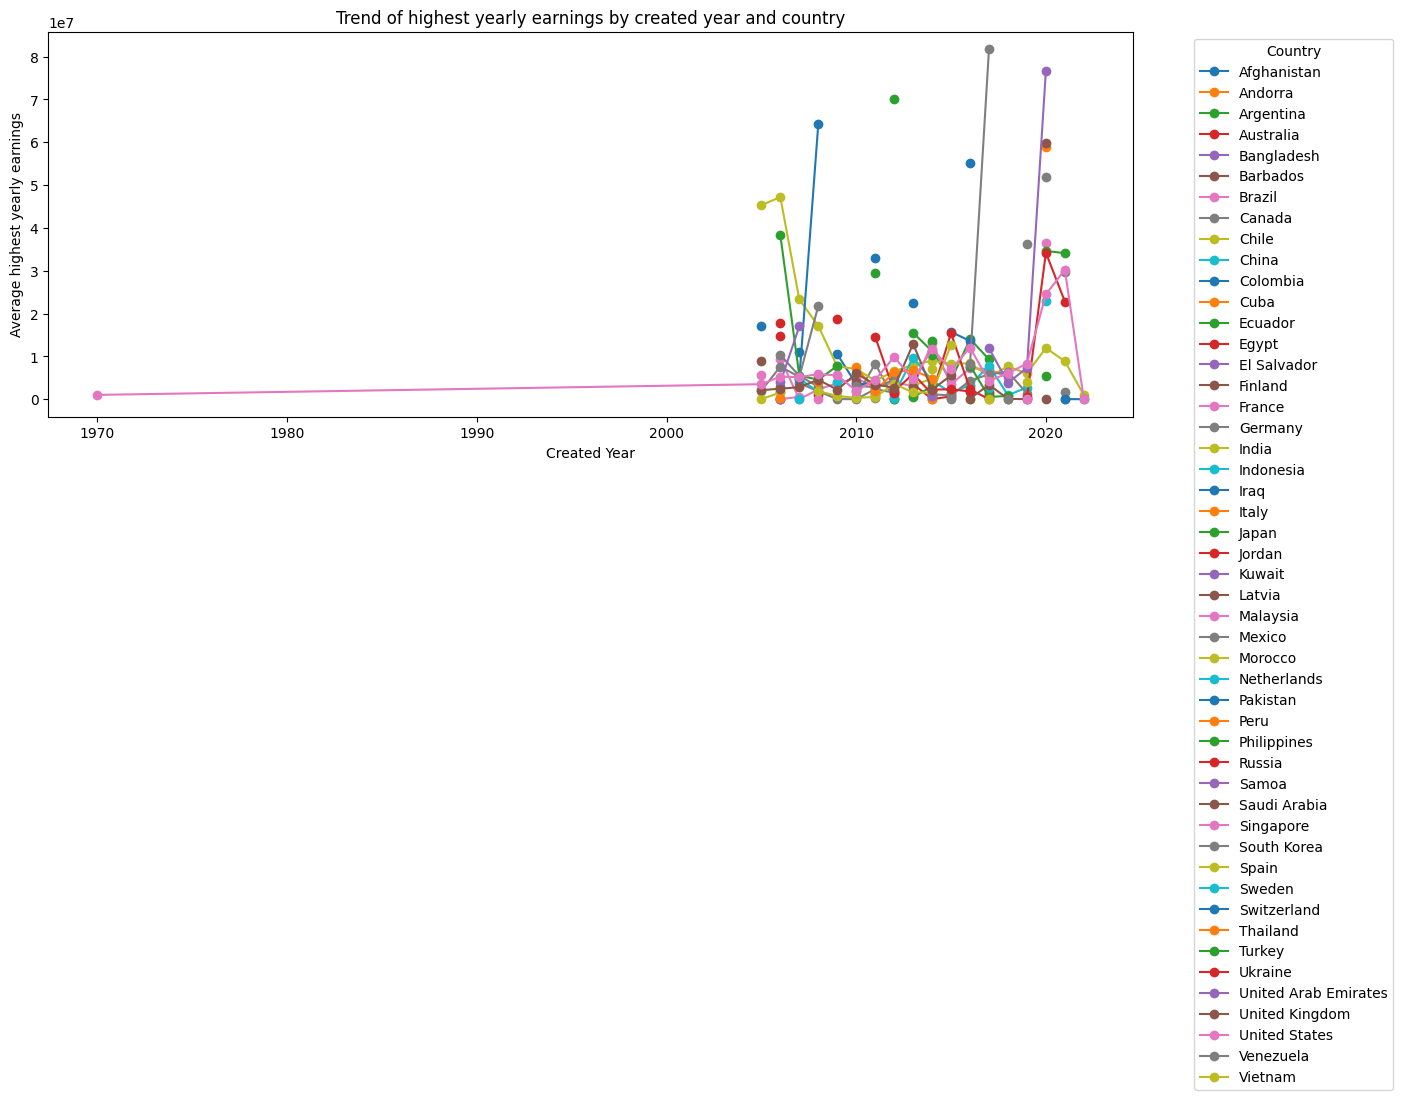

In [48]:
df.groupby(['created_year','Country'])['highest_yearly_earnings'].mean().unstack().plot(kind='line',marker='o',figsize=(14,5))
plt.title("Trend of highest yearly earnings by created year and country")
plt.xlabel('Created Year')
plt.ylabel('Average highest yearly earnings')
plt.legend(title='Country',bbox_to_anchor=(1.05,1),loc='upper left')

In [55]:
category_highest_monthly_earnings=df.groupby('category')['highest_monthly_earnings'].sum().sort_values()
category_highest_monthly_earnings

category
Travel & Events            124000.00
Trailers                   723800.00
Nonprofits & Activism      780800.00
Movies                     909400.00
Autos & Vehicles          2172700.00
Pets & Animals            3177729.00
Science & Technology      3434735.00
Howto & Style             7711962.34
Sports                    8876300.00
News & Politics          16708431.00
Gaming                   25559111.38
Shows                    26489600.00
Education                31283000.10
Film & Animation         33704283.22
Comedy                   46113543.00
People & Blogs           72183154.16
Music                   111564523.95
Entertainment           150056865.14
Name: highest_monthly_earnings, dtype: float64

Text(0, 0.5, '')

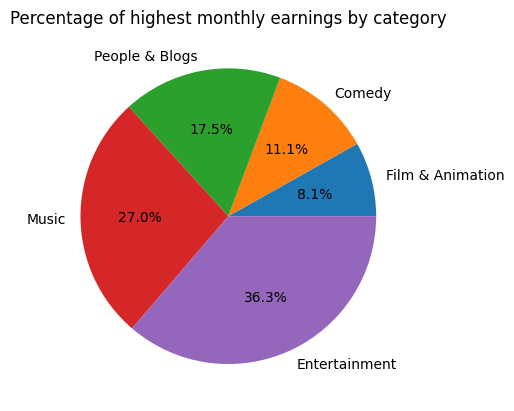

In [56]:
category_highest_monthly_earnings.tail().plot(kind='pie',autopct='%1.1f%%')
plt.title("Percentage of highest monthly earnings by category")
plt.ylabel("")

In [58]:
channel_created_susbs=df.groupby(['channel_type','created_year'])['subscribers_for_last_30_days'].mean().unstack()
channel_created_susbs

created_year,1970.00,2005.00,2006.00,2007.00,2008.00,2009.00,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00,2022.00
channel_type,,,,,,,,,,,,,,,,,,,
Animals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600000.00,NaN,NaN,NaN,NaN,NaN,1100000.00,NaN,NaN
Autos,NaN,NaN,2.00,500000.00,NaN,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comedy,NaN,400000.00,100000.00,100000.25,200000.00,400000.00,NaN,50000.50,NaN,100000.00,1166666.67,150000.00,700000.00,100000.00,200050.00,1000000.00,1200000.00,600000.00,NaN
Education,NaN,NaN,700000.00,NaN,200000.00,100000.00,200000.00,200000.00,350000.00,283333.33,550000.00,200000.00,233333.33,200000.00,200000.00,100000.00,300000.00,NaN,300000.00
Entertainment,300000.00,325000.00,306250.50,342857.29,450000.00,480000.00,212575.00,442857.14,760000.00,233334.00,200000.00,300000.00,830001.40,700000.00,230769.23,160000.00,1212500.00,580000.00,500000.00
Film,NaN,1.00,333333.33,NaN,100000.00,NaN,NaN,225007.50,300000.00,350000.00,342857.14,250000.00,250000.00,600000.00,NaN,500000.00,450500.00,NaN,NaN
Games,NaN,100000.00,337.67,50005.50,100000.00,200000.00,3.00,150000.00,376923.15,245454.55,260000.00,660716.00,357142.86,100003.33,151000.00,NaN,750000.00,NaN,NaN
Howto,NaN,500000.00,NaN,NaN,NaN,100000.00,100000.00,NaN,NaN,NaN,NaN,100000.00,100000.00,100000.00,633333.33,100000.00,NaN,300000.00,NaN
Music,NaN,160000.20,433333.67,146159.62,185384.85,153846.15,175000.00,158829.41,200000.00,400000.00,230769.23,125016.25,240010.00,300000.00,300000.00,50005.00,NaN,NaN,NaN


Text(195.72222222222223, 0.5, 'Channel_type')

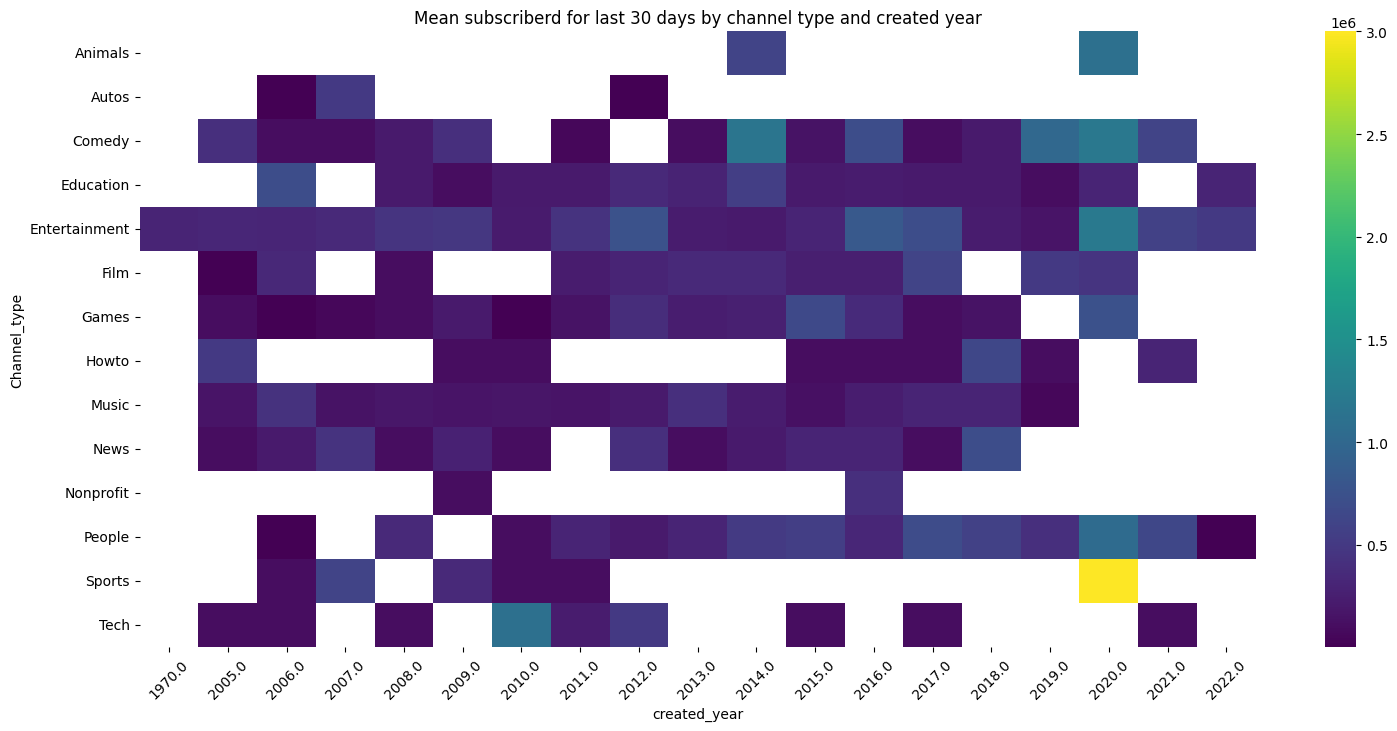

In [66]:
plt.figure(figsize=(18, 8))
sns.heatmap(channel_created_susbs,cmap='viridis')
plt.title("Mean subscriberd for last 30 days by channel type and created year")
plt.xlabel("created_year")
plt.xticks(rotation=45)
plt.ylabel("Channel_type")

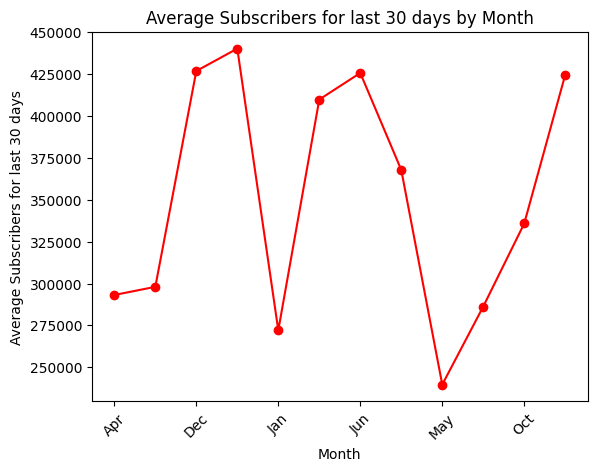

In [70]:
df.groupby('created_month')['subscribers_for_last_30_days'].mean().plot(kind='line',marker='o',color='red')
plt.title("Average Subscribers for last 30 days by Month")
plt.xlabel("Month")
plt.ylabel("Average Subscribers for last 30 days")
plt.xticks(rotation=45)
plt.show()